In [1]:
import numpy as np
from sklearn.externals import joblib
import copy
import random
import math
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.utils import shuffle
from sklearn import metrics
from ipywidgets import interact
import ipywidgets as widgets
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
datadict = joblib.load("Two_Port_Standard_Dictionary_Cleaned_Interpolated.pkl")

In [3]:
num_fake_points = 15000
magS11_deviation = 0.003
magS21_deviation = 0.0001
magS22_deviation = 0.003

In [4]:
magS11_points = []
magS21_points = []
magS22_points = []
for i in range(num_fake_points):
    new_dataset = copy.deepcopy(datadict['CTN210']['System 2,7'][random.choice(datadict['CTN210']['System 2,7'].keys())])
    new_dataset["magS11"] += np.random.normal(0,magS11_deviation,50)
    new_dataset["magS21"] += np.random.normal(0,magS21_deviation,50)
    new_dataset["magS22"] += np.random.normal(0,magS22_deviation,50)
    magS11_points.append(new_dataset["magS11"].tolist())
    magS21_points.append(new_dataset["magS21"].tolist())
    magS22_points.append(new_dataset["magS22"].tolist())
magS11_arr = np.array(magS11_points)
magS21_arr = np.array(magS21_points)
magS22_arr = np.array(magS22_points)

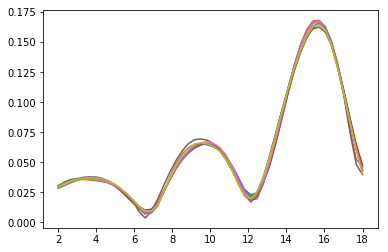

In [5]:
for key in datadict['CTN210']['System 2,7'].keys():
    plt.plot(np.linspace(2,18,50),datadict['CTN210']['System 2,7'][key]["magS11"])
plt.show()

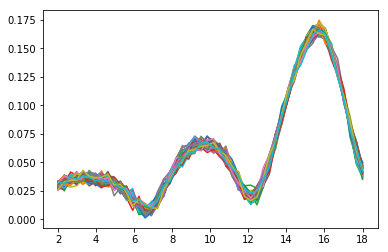

In [6]:
for i in range(50):
    plt.plot(np.linspace(2,18,50),random.choice(magS11_arr))
plt.show()

In [7]:
frequency_range = np.linspace(2,18,50)
sin_list = []
for i in range(num_fake_points):
    vals = np.fabs((frequency_range * np.sin((1.0/6.0) * math.pi * ((random.random() * 0.25)+0.875) * frequency_range) * 0.01) + 
                     np.random.normal(0,magS11_deviation,50) + (random.random() * 0.025))
    sin_list.append(vals)
full_data = copy.deepcopy(sin_list)
full_data.extend(magS11_arr.tolist())
training_data = np.array(full_data)
print training_data

[[ 0.04217094  0.04346382  0.04736504 ...,  0.03569961  0.07003482
   0.10310302]
 [ 0.02301313  0.03457093  0.04185775 ...,  0.03783094  0.06971776
   0.10045355]
 [ 0.03065465  0.02962035  0.03849302 ...,  0.08875621  0.1201279
   0.1375229 ]
 ..., 
 [ 0.03047267  0.03343202  0.03762036 ...,  0.08696185  0.06494318
   0.05024716]
 [ 0.03424885  0.03283898  0.03532647 ...,  0.07277028  0.05465665
   0.04511247]
 [ 0.0271626   0.03071874  0.03405169 ...,  0.08286227  0.05456693
   0.04487348]]


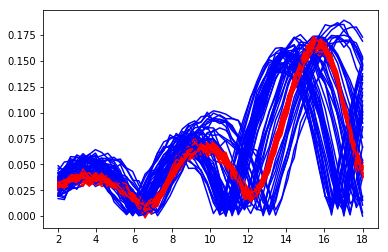

In [8]:
for i in range(50):
    plt.plot(frequency_range,sin_list[i],"b",frequency_range,magS11_arr[i],"r")
plt.show()

In [9]:
clf = svm.SVC(gamma=0.001, C=100.)
targets = ["not valid","valid"]
target_data = np.repeat(targets,num_fake_points)
print target_data

['not valid' 'not valid' 'not valid' ..., 'valid' 'valid' 'valid']


In [10]:
training_data,target_data = shuffle(training_data,target_data, random_state=0)

In [11]:
print len(training_data)
print len(target_data)

30000
30000


In [12]:
clf.fit(training_data[:num_fake_points],target_data[:num_fake_points])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
expected = target_data[num_fake_points:]
predicted = clf.predict(training_data[num_fake_points:])

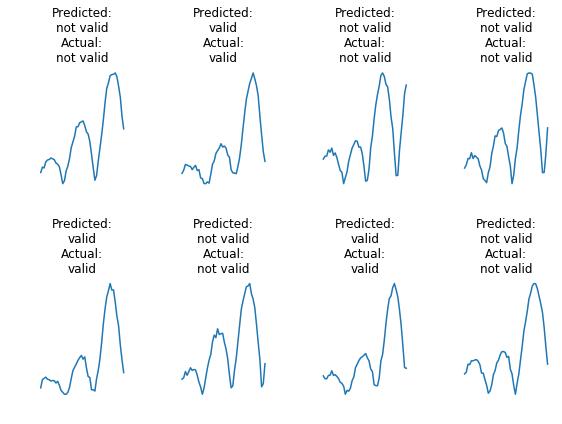

In [14]:
plt.figure(figsize=(8,6))
for i in range(8):
    plt.subplot(2,4,i+1)
    index = random.randint(0,len(predicted)-1)
    plt.title("Predicted:\n" + str(predicted[index]) + "\nActual:\n" + str(expected[index]))
    plt.axis("off")
    plt.plot(frequency_range,training_data[num_fake_points+index])
plt.tight_layout()
plt.show()

In [15]:
print metrics.classification_report(expected, predicted)

             precision    recall  f1-score   support

  not valid       1.00      1.00      1.00      7503
      valid       1.00      1.00      1.00      7497

avg / total       1.00      1.00      1.00     15000



In [16]:
print metrics.confusion_matrix(expected, predicted)

[[7503    0]
 [   0 7497]]


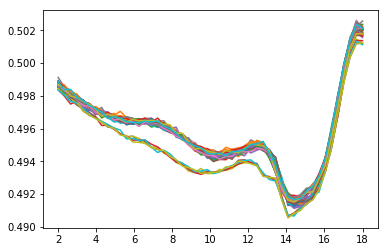

In [17]:
for i in range(50):
    plt.plot(np.linspace(2,18,50),random.choice(magS21_arr))
plt.show()

In [18]:
def magS21_classification(randomness_amplitude=0.0014):
    plt.figure(figsize=(8,6))
    #Showing the original faked data
    plt.subplot(2,1,1)
    plt.title("Original Good Data")
    for i in range(50):
        plt.plot(np.linspace(2,18,50),random.choice(magS21_arr))
    #Creating incorrect, more noisy data
    incorrect_magS21_data = copy.deepcopy(magS21_arr)
    for i in range(len(incorrect_magS21_data)):
        incorrect_magS21_data[i] = (incorrect_magS21_data[i] + np.random.normal(0,randomness_amplitude,50))
    #Plotting bad data (blue) vs good data (red)
    plt.subplot(2,1,2)
    plt.title("Good Data(Red) vs Bad Data(Blue)")
    for i in range(50):
        plt.plot(frequency_range,incorrect_magS21_data[i],"b")
    for i in range(50):
        plt.plot(frequency_range,magS21_arr[i],"r")
    plt.show()
    #Making target and training data arrays
    S21_training_data = []
    S21_training_data.extend(incorrect_magS21_data.tolist())
    S21_training_data.extend(magS21_arr.tolist())
    S21_training_data_arr = np.array(S21_training_data)
    targets = ["not valid","valid"]
    S21_target_arr = np.repeat(targets,len(magS21_arr))
    S21_training_data_arr,S21_target_arr = shuffle(S21_training_data_arr,S21_target_arr, random_state=0)
    #Making and training classifier
    clf = GaussianNB()
    print "Made Classifier!"
    clf.fit(S21_training_data_arr[:len(magS21_arr)],S21_target_arr[:len(magS21_arr)])
    print "Finished Training Classifier!"
    #Making Predictions
    expected = S21_target_arr[len(magS21_arr):]
    predicted = clf.predict(S21_training_data_arr[len(magS21_arr):])
    print "Classification Report:"
    print metrics.classification_report(expected, predicted)
    print "Confusion Matrix:"
    print metrics.confusion_matrix(expected, predicted)
def magS21_f1score(randomness_amplitude=0.0014):
    incorrect_magS21_data = copy.deepcopy(magS21_arr)
    for i in range(len(incorrect_magS21_data)):
        incorrect_magS21_data[i] = (incorrect_magS21_data[i] + np.random.normal(0,randomness_amplitude,50))
    #Making target and training data arrays
    S21_training_data = []
    S21_training_data.extend(incorrect_magS21_data.tolist())
    S21_training_data.extend(magS21_arr.tolist())
    S21_training_data_arr = np.array(S21_training_data)
    targets = ["not valid","valid"]
    S21_target_arr = np.repeat(targets,len(magS21_arr))
    S21_training_data_arr,S21_target_arr = shuffle(S21_training_data_arr,S21_target_arr, random_state=0)
    #Making and training classifier
    clf = GaussianNB()
    clf.fit(S21_training_data_arr[:len(magS21_arr)],S21_target_arr[:len(magS21_arr)])
    #Making Predictions
    expected = S21_target_arr[len(magS21_arr):]
    predicted = clf.predict(S21_training_data_arr[len(magS21_arr):])
    return metrics.f1_score(expected, predicted, average="macro")

In [19]:
f1scores = []
j=0
f1_score_test_range = np.arange(0.0001,0.01,0.00001).tolist()
for i in f1_score_test_range:
    f1score = magS21_f1score(randomness_amplitude = i)
    f1scores.append(f1score)
    j+=1
    if j%((len(f1_score_test_range)/10)+1) == 0:
        print "did " + str(j) + " iterations!"
print "done!"

did 100 iterations!
did 200 iterations!
did 300 iterations!
did 400 iterations!
did 500 iterations!
did 600 iterations!
did 700 iterations!
did 800 iterations!
did 900 iterations!
done!


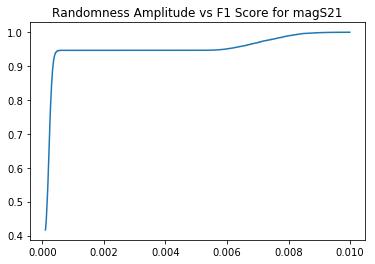

In [20]:
plt.title("Randomness Amplitude vs F1 Score for magS21")
plt.plot(f1_score_test_range,f1scores)
plt.show()